# **Image Data Augmentation**


## 데이터가 부족한 세상으로 떠나기 위한 준비

In [1]:
from tensorflow.keras.preprocessing.image import load_img # 이미지 불러오기
from tensorflow.keras.preprocessing.image import img_to_array # 이미지 넘파이 배열화
# 근데 이 프로세싱.이미지 방법이 언젠가 없어질 방법이지만 구글링했을 때 자료가 많이 나옴...

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -version

wget: Invalid --execute command ‘rsion’


In [3]:
# 강사님 깃허브에 있는 배트맨 사진을 가져옴
!wget -O Batman.webp https://github.com/DrKAI/image/raw/main/Batman01.webp

--2023-03-14 05:32:40--  https://github.com/DrKAI/image/raw/main/Batman01.webp
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/DrKAI/image/main/Batman01.webp [following]
--2023-03-14 05:32:40--  https://raw.githubusercontent.com/DrKAI/image/main/Batman01.webp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 281262 (275K) [image/webp]
Saving to: ‘Batman.webp’

Batman.webp         100%[===================>] 274.67K  --.-KB/s    in 0.03s   

2023-03-14 05:32:40 (8.04 MB/s) - ‘Batman.webp’ saved [281262/281262]



In [4]:
image_org = load_img('Batman.webp')
image = img_to_array(image_org)
image.shape  # height, width, depth (높이, 해상도, RGB)

# 데이터의 수를 의미함 맨 앞에 있는 것은(데이터 수, 높이, 너비, 3색) >> (50000, 32, 32, 3)

(1600, 1136, 3)

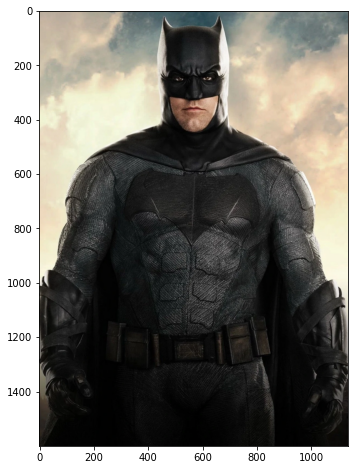

In [5]:
plt.figure(figsize=(12,8))
# plt.imshow(image)
plt.imshow(image/255)
plt.show()

In [6]:
image = np.expand_dims(image, axis=0) # 데이터 개수를 담당할 차원 추가

In [7]:
image.shape

(1, 1600, 1136, 3)

## **ImageDataGenerator**

[전체 옵션 참고](https://keras.io/preprocessing/image/)

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # 이미지 데이터에 대해서 아래에 있는 것처럼 적용할 거야.

In [11]:
aug = ImageDataGenerator(rotation_range=30,      # 이미지 회전
                         width_shift_range=0.1,  # 이미지 좌우 이동
                         height_shift_range=0.1, # 이미지 상하 이동
                         zoom_range=0.2,         # 확대/축소 범위
                         shear_range=0.2,        # 비스듬히 늘림
                         horizontal_flip=True,   # 가로 전환
                         vertical_flip=True,     # 세로 전환           
                         fill_mode='nearest')    # 마지막 옵션 주의하자. 이미지 회전, 이동, 축소할 때 발생하는 공간을 채우는 방식

- aug라는 객체가 만들어진 것

In [12]:
imageGen = aug.flow(image, # 이미지 어레이를 받아서.
                    batch_size=1,
                    save_to_dir='output',
                    save_prefix='image', # 접두사로 이미지라는 이름을 붙일 것이고
                    save_format='jpg' ) # 포맷은 jpg

In [13]:
!mkdir output

In [14]:
!ls output

In [15]:
total = 0

for image in imageGen:
    # 루프가 돌면서 이미지가 한장씩 생성된다.
    total += 1
    # 10장 채우면 멈추자
    if total == 20:
        break

In [16]:
!ls output

image_0_1325.jpg  image_0_509.jpg   image_0_6468.jpg  image_0_8733.jpg
image_0_1946.jpg  image_0_5794.jpg  image_0_6490.jpg  image_0_8742.jpg
image_0_2507.jpg  image_0_5804.jpg  image_0_744.jpg   image_0_9019.jpg
image_0_3487.jpg  image_0_624.jpg   image_0_8360.jpg  image_0_9280.jpg
image_0_3738.jpg  image_0_6431.jpg  image_0_8408.jpg  image_0_9986.jpg


In [17]:
import os

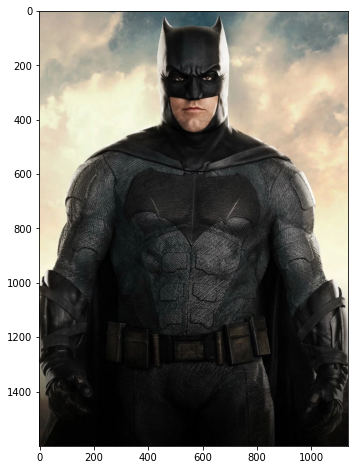

In [18]:
plt.figure(figsize=(12,8))
plt.imshow(image_org) # 아까 것과의 차이는?
plt.show()

In [19]:
os.listdir('output')

['image_0_9986.jpg',
 'image_0_624.jpg',
 'image_0_509.jpg',
 'image_0_5804.jpg',
 'image_0_9019.jpg',
 'image_0_6490.jpg',
 'image_0_8408.jpg',
 'image_0_6431.jpg',
 'image_0_744.jpg',
 'image_0_8742.jpg',
 'image_0_8360.jpg',
 'image_0_1946.jpg',
 'image_0_3738.jpg',
 'image_0_9280.jpg',
 'image_0_8733.jpg',
 'image_0_2507.jpg',
 'image_0_5794.jpg',
 'image_0_3487.jpg',
 'image_0_1325.jpg',
 'image_0_6468.jpg']

In [20]:
plt.figure(figsize=(20,40))
for i, each in enumerate(os.listdir('output')):
    filepath = './output/' + each

    img = plt.imread(filepath)
    plt.subplot(5, 4, i+1)
    plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.